In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
cf.go_offline()

In [2]:
#Leo df
df = pd.read_csv("../visualizing-real-world-data/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
#Inventigo df
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
#Elimino filas con valores nulos, me desvirtúan en análisis
df = df.dropna()

In [6]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
#Variable year es integer, no float
df['Year'] = df['Year'].apply(np.int64)

In [8]:
#Reviso df
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [50]:
#Quiero ver la evolución de nº de videojuegos por año
juegos_x_año = df[['Name','Year','Genre']]
juegos_x_año = juegos_x_año.groupby(juegos_x_año['Year']).agg({'Name': 'count'})
juegos_x_año = juegos_x_año.reset_index()
juegos_x_año

juegos_x_año.iplot(kind='line', x='Year', xTitle='Número de juegos', color='blue',
          yTitle='Nº juegos', title='Evolución producción de videojuegos por año')

In [52]:
#Nº de videojuegos por género
juegos_x_genero = df.pivot_table(index = ['Genre'], values = ['Global_Sales'], aggfunc = 'sum')
juegos_x_genero = juegos_x_genero.reset_index()


juegos_x_genero.iplot(kind='bar', x='Genre', xTitle='Género', color='blue',
          yTitle='Número de juegos', title='Número de juegos por género')

In [9]:
#Bar graph: Ventas globales por top publishers
data = df.groupby('Publisher', as_index=False).agg({'Global_Sales':'sum'})
data = data[data['Global_Sales']>100]

In [56]:
data.iplot(kind='bar', x='Publisher',  xTitle='Publisher',color='blue',
           yTitle='Global_Sales', title='Ventas globales por top publishers')

In [75]:
top_10.iplot(kind='bar', x='Name',  xTitle='Name',color='green',
           yTitle='Global_Sales (Millones de €)', title='Top 10 juegos en ventas')

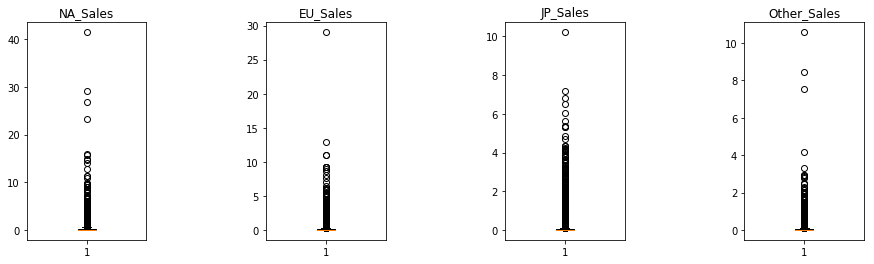

In [53]:
#Boxplot para entender la variabilidad de las muestras
sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
f, ax = plt.subplots(1,4)
f.set_figwidth(15)
f.subplots_adjust(wspace=1)

for i in range(0,4):
    ax[i].set_title(sales[i])
    ax[i].boxplot(df[sales[i]])

In [11]:
#Scatter plot - Funcionaría tambien un gráfico de líneas
Year_sales = df.pivot_table(index=["Genre","Year"],values=["Global_Sales"],aggfunc='sum')

In [12]:
#Hay que resetear el index para poder graficarlo
Year_sales = Year_sales.reset_index()
Year_sales.head()

,Genre,Year,Global_Sales
0,Action,1980,0.34
1,Action,1981,14.84
2,Action,1982,6.52
3,Action,1983,2.86
4,Action,1984,1.85


In [74]:
Year_sales.iplot(kind='line', x='Year', y='Global_Sales', categories= 'Genre', xTitle='Year',
           yTitle='Global_Sales (Millones de €)' )

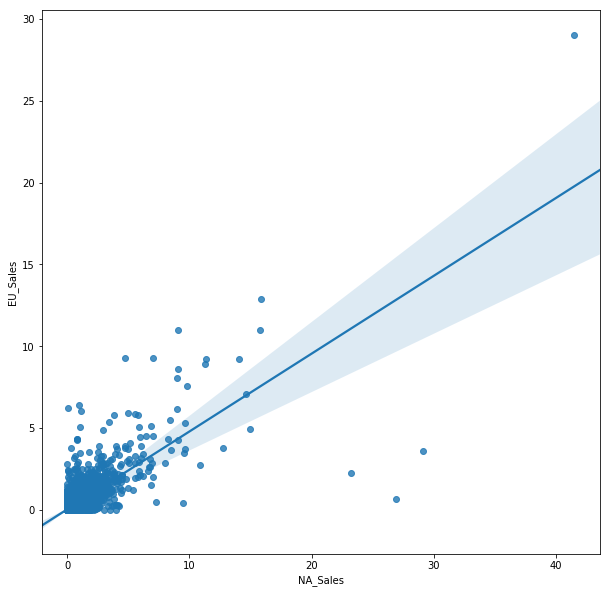

In [14]:
#Vamos a comprobar si 2 variables continuas tienen correlación entre ellas:
plt.figure(figsize= (10,10))
sns.regplot(data = df, x='NA_Sales', y='EU_Sales')

In [15]:
df['NA_Sales'].corr(df['EU_Sales'])

0.7689229927565608

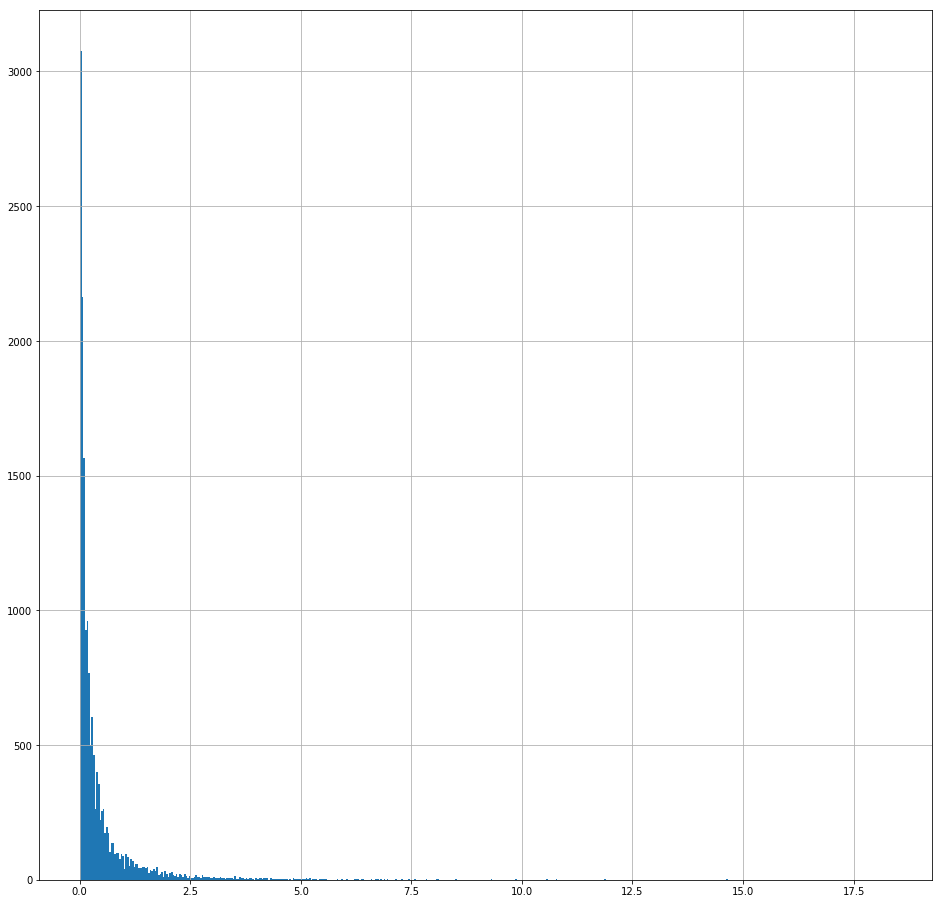

In [48]:
#Histograma de global sales
Global_Sales = df[df['Global_Sales']<20]
df[df['Global_Sales']<20]['Global_Sales'].hist(bins=500,figsize=(16,16));

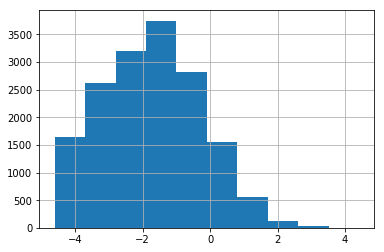

In [37]:
#Hago una transformación logarítmica por si quisiera meterla en un modelo
np.log(df['Global_Sales']).hist()

In [68]:
top_10 = df.pivot_table(index = ['Name'], values = ['Global_Sales'], aggfunc = 'sum')
top_10 = top_10.reset_index()
top_10 = top_10.sort_values(by = 'Global_Sales', ascending= False).head(10)
top_10

,Name,Global_Sales
10849,Wii Sports,82.74
3650,Grand Theft Auto V,55.92
9201,Super Mario Bros.,45.31
9581,Tetris,35.84
5493,Mario Kart Wii,35.82
10851,Wii Sports Resort,33.00
7247,Pokemon Red/Pokemon Blue,31.37
1210,Call of Duty: Modern Warfare 3,30.83
6632,New Super Mario Bros.,30.01
1206,Call of Duty: Black Ops II,29.72
